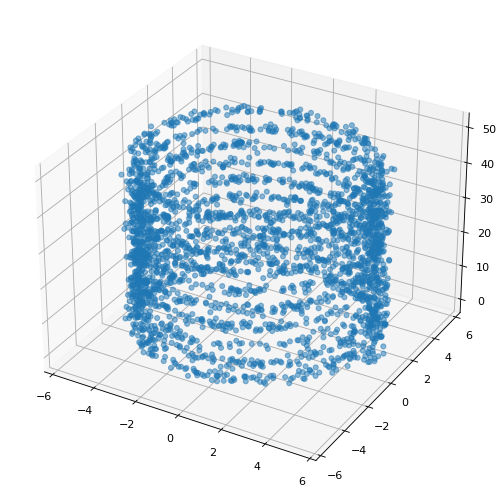

In [31]:
%matplotlib inline
from lib import YouTube
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import sklearn.preprocessing


def helix(radius=5.0, step=5.0, count=1000, noize=0.2):
    """Generate data along a 3D helix."""
    phi = np.random.uniform(0, 2 * np.pi * 10, size=count)
    x = radius * np.cos(phi)
    y = radius * np.sin(phi)
    z = step * phi / (2 * np.pi)
    points = np.dstack([x, y, z])[0] + np.random.normal(0.0, noize, size=(count, 3))
    return points


def scatter3d(data):
    """Show 3D scatter plot."""
    fig = plt.figure(figsize=(8, 8), dpi=80)
    axes = fig.add_subplot(projection="3d")
    axes.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.5)
    return fig

def scatter2d(data):
    """Show 2D scatter plot."""
    fig = plt.figure(figsize=(5, 5), dpi=80)
    axes = fig.gca()
    axes.set_aspect('equal', adjustable='box')
    axes.scatter(data[:, 0], data[:, 1], alpha=0.5)

data = helix(count=3000, noize=0.2)
fig = scatter3d(data)

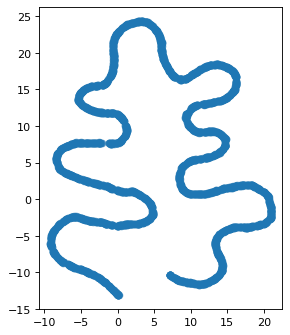

In [42]:
import umap

embeddings = umap.UMAP(
    n_neighbors=30,
    min_dist=0.3,
    metric='euclidean'
).fit_transform(data)

fig = scatter2d(embeddings)